# SARIMA Model Training

This notebook is used for training the SARIMA model on the processed admissions data to make predictions for the daily and total number of online admission applications from July to August.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the processed data
data_path = '../data/processed/admissions_data_processed.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()

,date,applications
0,2020-07-01,153
1,2020-07-02,167
2,2020-07-03,142
3,2020-07-04,178
4,2020-07-05,161


## Data Preparation

In this section, we will prepare the data for training the SARIMA model.

In [16]:
# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the date as the index
data.set_index('date', inplace=True)

# Resample the data to daily frequency and fill missing values
data = data.resample('D').sum().fillna(0)

# Display the prepared data
data.head()

,applications
date,
2020-07-01,153
2020-07-02,167
2020-07-03,142
2020-07-04,178
2020-07-05,161


## Model Training

Now we will train the SARIMA model on the prepared data.

In [17]:
# Define the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(data['applications'], order=order, seasonal_order=seasonal_order)

# Fit the model
model_fit = model.fit(disp=False)

# Print the model summary
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       applications   No. Observations:                 1523
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6251.470
Date:                            Wed, 05 Mar 2025   AIC                          12512.940
Time:                                    17:19:53   BIC                          12539.539
Sample:                                07-01-2020   HQIC                         12522.846
                                     - 08-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2519      0.086     -2.920      0.003      -0.421      -0.083
ma.L1          0.0040      0.088   

## Forecasting

We will now use the trained model to make predictions for the next two months.

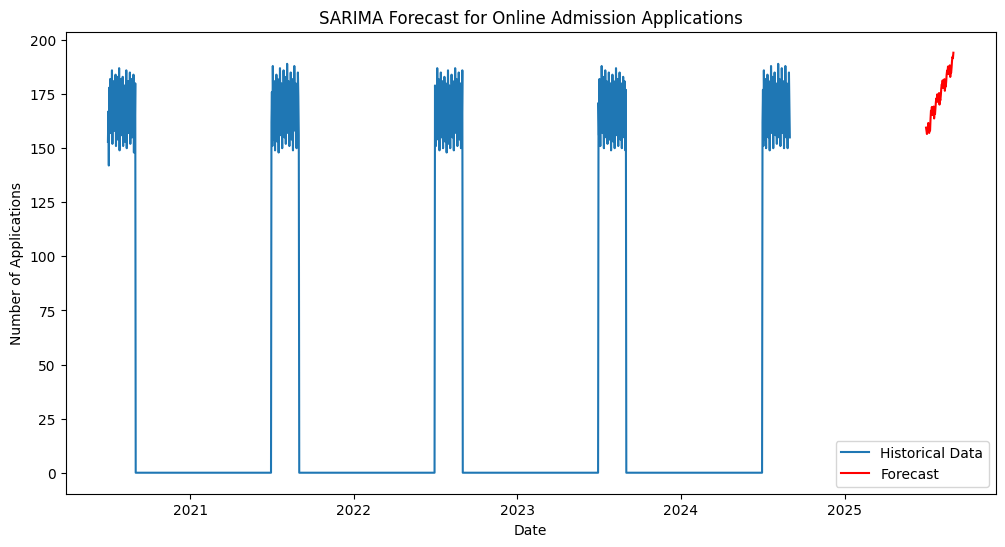

In [18]:
# Fit the SARIMA model
model = SARIMAX(data['applications'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast for the next July
next_year = data.index[-1].year + 1
start_date = pd.Timestamp(f'{next_year}-07-01')
end_date = pd.Timestamp(f'{next_year}-08-31')
forecast = model_fit.get_forecast(steps=(end_date - start_date).days + 1)
forecast_index = pd.date_range(start=start_date, end=end_date)
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['applications'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('SARIMA Forecast for Online Admission Applications')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.legend()
plt.show()